<a href="https://colab.research.google.com/github/nallagondu/DATASCIENCE-practice/blob/featurebranch/datatrain_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# GitHub raw file URL
url = "https://raw.githubusercontent.com/nallagondu/datatrained-training-ml-Files/main/Advertising.csv"


In [5]:

# Read the CSV file from the URL
data = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(data.head())

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [6]:
data.shape

(200, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

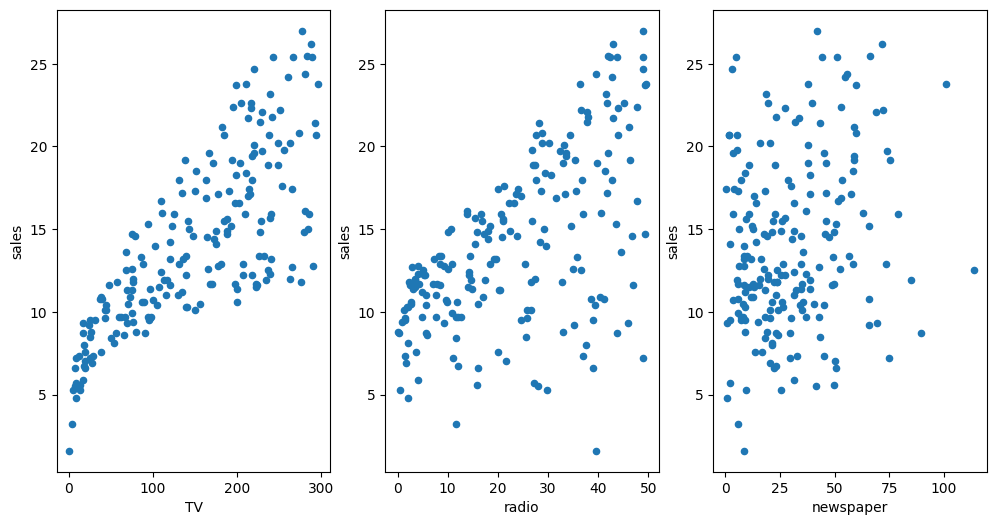

In [9]:
fig, axs = plt.subplots(1,3)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(12,6))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])
fig.savefig('testdata.jpg')

In [10]:
#Create x = feature and Y = label
X = data[['TV']]
y = data.sales

#follow the usual sklearn pattern : import ,instantiate,fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [11]:
#print interset and coefficent
print(lm.intercept_)
print(lm.coef_)

7.032593549127695
[0.04753664]


Interpeting the Model
How do we interpret the coefficient for spends on TV ad (beta1)?


In [12]:
7.032593549127695 + 0.04753664*50


9.409425549127695

In [13]:
lm.predict([[50]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.40942557])

R-Squared

In [14]:
from sklearn.metrics import r2_score
predicted_sales = lm.predict(X)

https://www.desmos.com/3d/f887852906

In [15]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [16]:
predicted_sales

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [17]:
#compate original sales with modelpredicted sales
r2_score(y_true=y,y_pred=predicted_sales)

0.611875050850071

**R-Squared vs. Adjusted R-Squared**
R-squared only works as intended in a simple linear regression model with one explanatory variable. With a multiple regression made up of several independent variables, the R-squared must be adjusted.

The adjusted R-squared compares the descriptive power of regression models that include diverse numbers of predictors. Every predictor added to a model increases R-squared and never decreases it. Thus, a model with more terms may seem to have a better fit just for the fact that it has more terms, while the adjusted R-squared compensates for the addition of variables; it only increases if the new term enhances the model above what would be obtained by probability and decreases when a predictor enhances the model less than what is predicted by chance.

In an overfitting condition, an incorrectly high value of R-squared is obtained, even when the model actually has a decreased ability to predict. This is not the case with the adjusted R-squared.

**R-Squared vs. Beta**
Beta and R-squared are two related, but different, measures of correlation. Beta is a measure of relative riskiness. A mutual fund with a high R-squared correlates highly with a benchmark. If the beta is also high, it may produce higher returns than the benchmark, particularly in bull markets.

R-squared measures how closely each change in the price of an asset is correlated to a benchmark. Beta measures how large those price changes are relative to a benchmark. Used together, R-squared and beta can give investors a thorough picture of the performance of asset managers. A beta of exactly 1.0 means that the risk (volatility) of the asset is identical to that of its benchmark.

Essentially, R-squared is a statistical analysis technique for the practical use and trustworthiness of betas of securities.


**Limitations of R-Squared**
R-squared will give you an estimate of the relationship between movements of a dependent variable based on an independent variable’s movements. However, it doesn’t tell you whether your chosen model is good or bad, nor will it tell you whether the data and predictions are biased.

A high or low R-squared isn’t necessarily good or bad—it doesn’t convey the reliability of the model or whether you’ve chosen the right regression. You can get a low R-squared for a good model, or a high R-squared for a poorly fitted model, and vice versa.

**What is a ‘good’ R-squared value?**
What qualifies as a “good” R-squared value will depend on the context. In some fields, such as the social sciences, even a relatively low R-squared value, such as 0.5, could be considered relatively strong. In other fields, the standards for a good R-squared reading can be much higher, such as 0.9 or above. In finance, an R-squared above 0.7 would generally be seen as showing a high level of correlation, whereas a measure below 0.4 would show a low correlation. This is not a hard rule, however, and will depend on the specific analysis.

**What does an R-squared value of 0.9 mean?**
Essentially, an R-squared value of 0.9 would indicate that 90% of the variance of the dependent variable being studied is explained by the variance of the independent variable. For instance, if a mutual fund has an R-squared value of 0.9 relative to its benchmark, this would indicate that 90% of the variance of the fund is explained by the variance of its benchmark index.

In [18]:
x = data[['TV', 'radio', 'newspaper']]
y = data.sales
lm = LinearRegression()
lm.fit(x, y)
print('Intercept : -> ',lm.intercept_)
print('TV : -> ',lm.coef_[0])
print('Radio : -> ',lm.coef_[1])
print('Newspaper : -> ',lm.coef_[2])

Intercept : ->  2.938889369459412
TV : ->  0.0457646454553976
Radio : ->  0.18853001691820448
Newspaper : ->  -0.0010374930424763285


**How do we interpret these coeffecients?**
if we look at the coeffeients,the coefficient for the newspaper spends in negitive.
it means that the money spent for newspapers advertisemens is not contributing in a positive way to the sales

**Feature selection**
How do I decided which fearure have to be included in a linear model ?

In [19]:
#Preparing data for r2_score on TV and radio as we can see they are positively related (co-efficient)
x = data[['TV','radio']]
y = data.sales

In [20]:
#let's feed features and label and train the model
lm.fit(x,y)

LinearRegression()

In [21]:
#check the r2
predicted_sales = lm.predict(x)
r2_score(y,predicted_sales)


0.8971942610828957

In [22]:
#Do the same for all fetures
x = data[['TV','radio','newspaper']]
y = data.sales
lm.fit(x,y)

predicted_sales = lm.predict(x)
r2_score(y,predicted_sales)

0.8972106381789522

In above model,even we added the newspaper there is no chneg in value .so we have to thing the use of newspaper investment plan is usefull or not .

**Project_1 with Linear regression**
we need to prediect the chance od admission bases on the students various scores
fature or independent varaibles

1.GRE score
2.TOEFL score
3.University Rating
4.SOP
5.LOR
6.CGPA
7.research

**Label/Target **
Change of admit

always refer sklearn official doc if you are not sure about the syntax of predection

https://scikit-learning.org



In [23]:
#lets start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')



In [24]:
#read CSV file and convert into data frame
# GitHub raw file URL
url = "https://raw.githubusercontent.com/nallagondu/datatrained-training-ml-Files/main/Admission_Prediction.csv"
data = pd.read_csv(url)
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [25]:
data.shape

(500, 9)

**DATA PRE-PROCESSING STEPS**(70 -80 % time spend here  remaining model building)


1.Data cleaning

2.EDA(ANALYSIS)

3.Finding and treating Outliners(if any)

4.feature selection for modelbuilding

5.Data standardization

6.Train test Split


In [26]:
# DATA PRE-PROCESSING
#1.Data cleaning
#2.EDA(ANALYSIS)
#3.Finding and treating Outliners(if any)
#4.feature selection for modelbuilding
data = data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [27]:
#Understand data at high level.Check the statistics of data setdata.describe()
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [28]:
#fill the null values
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())


In [29]:
# verify if NaN's are filled
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [30]:

data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [31]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Now the data looks good and tehre are no missing values.Also the first colun is just serial numbers ,so we can don't need that column.
lets drop it form data and made it more clear



Lets visualize the data

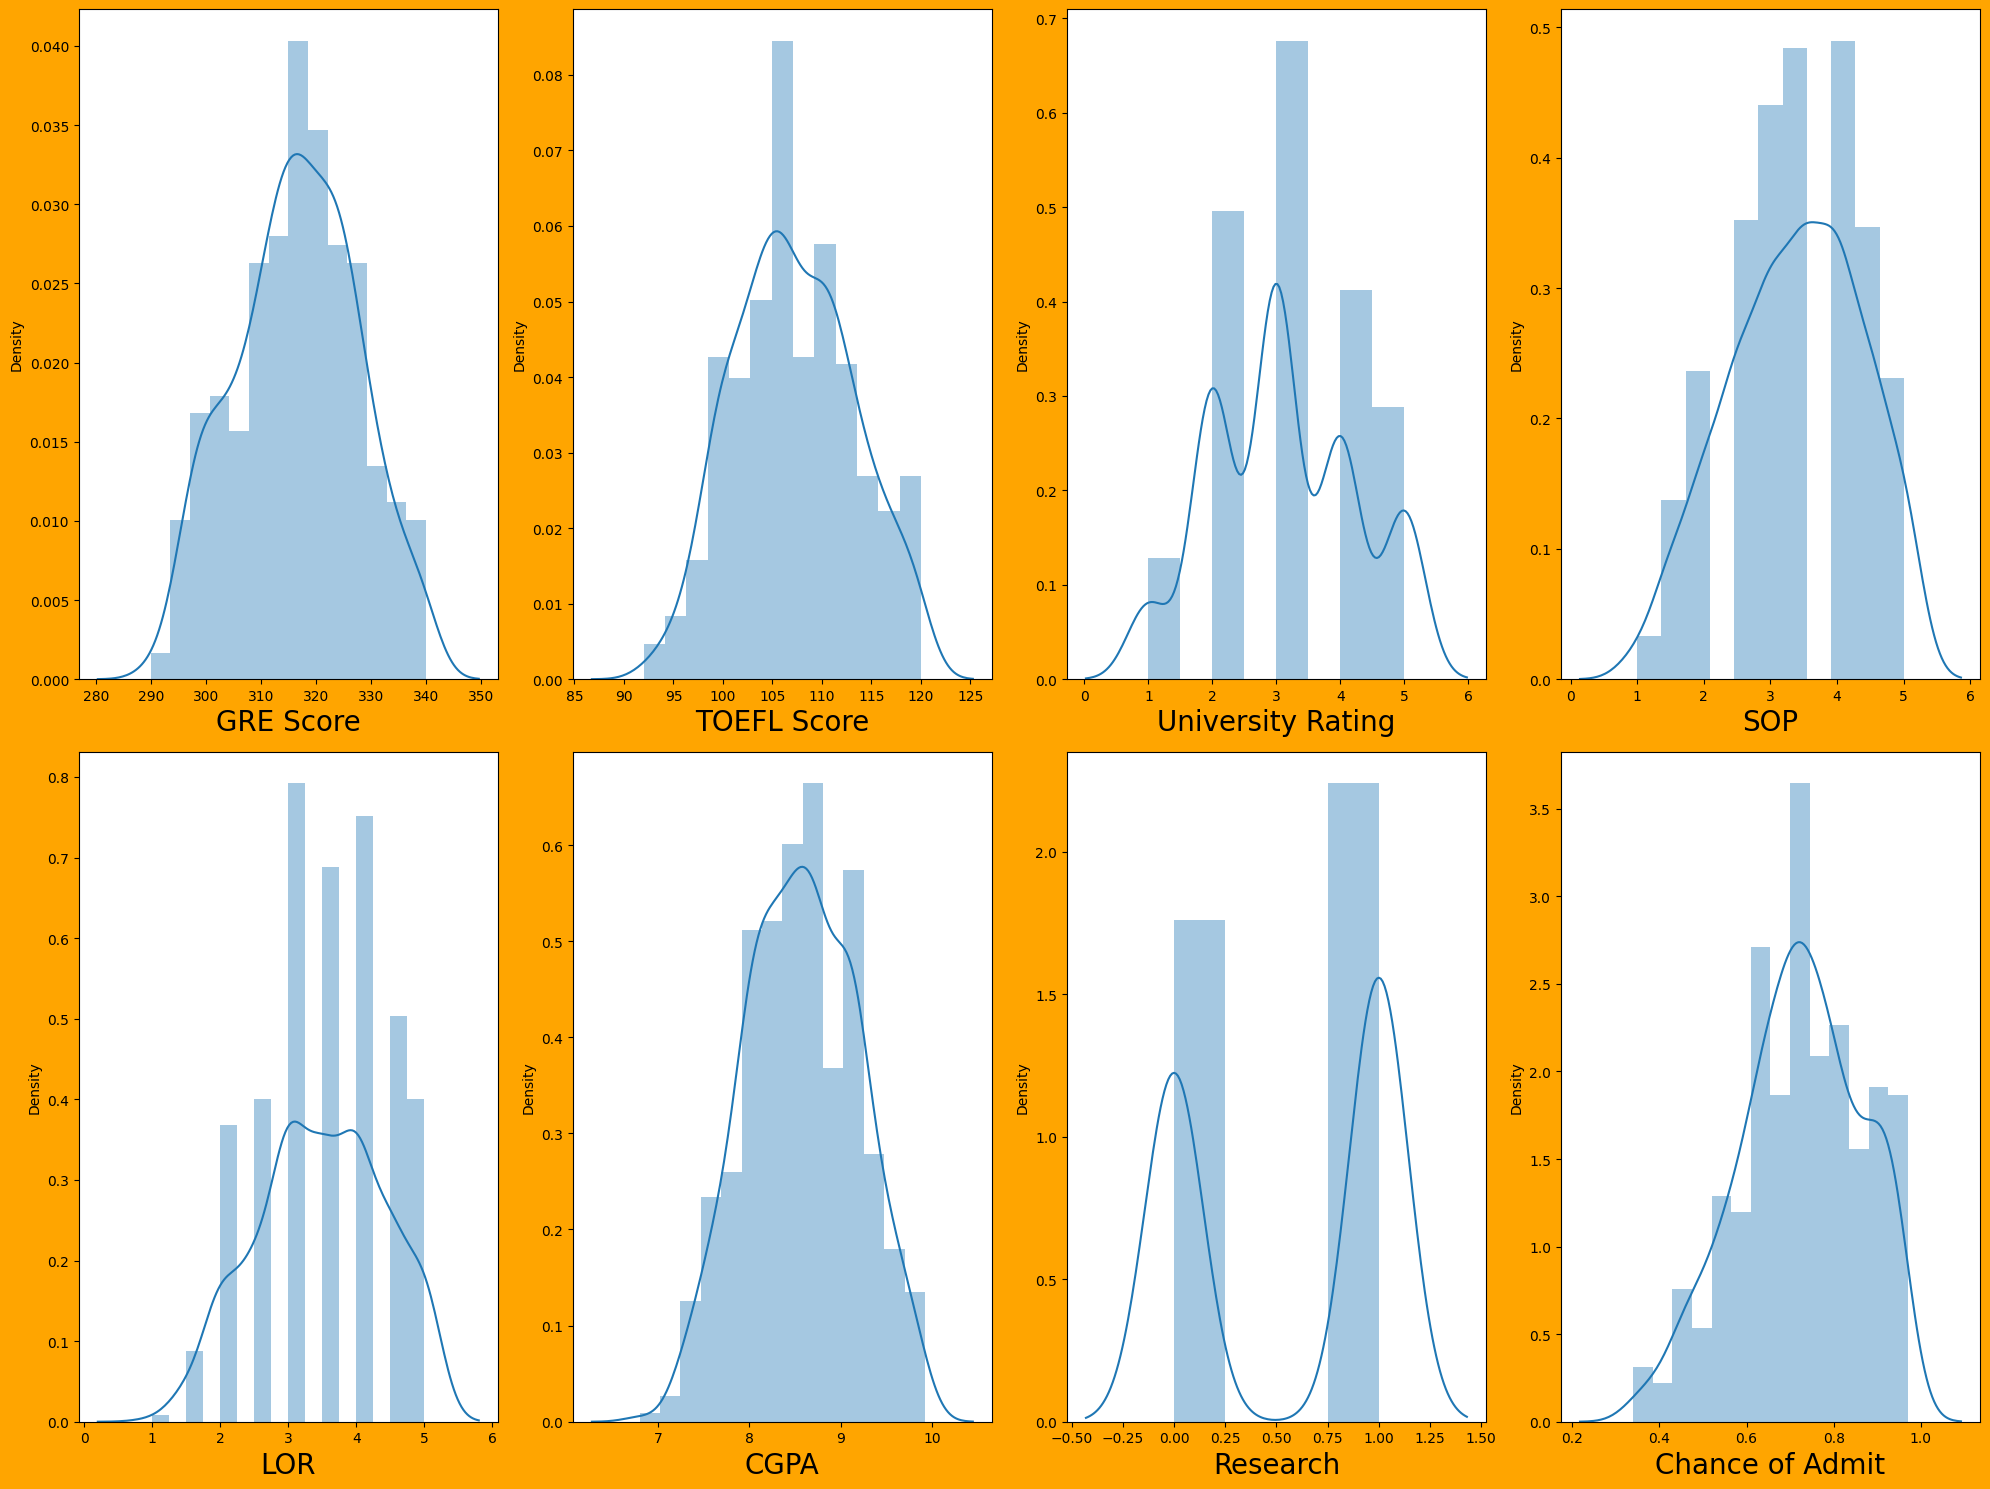

In [32]:
#lets see how the data is distributed for every column

plt.figure(figsize=(20,15), facecolor='orange')
plotnumber = 1

for column in data:
    if plotnumber<=8:
         ax = plt.subplot(2,4,plotnumber)
         sns.distplot(data[column])
         plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.tight_layout()

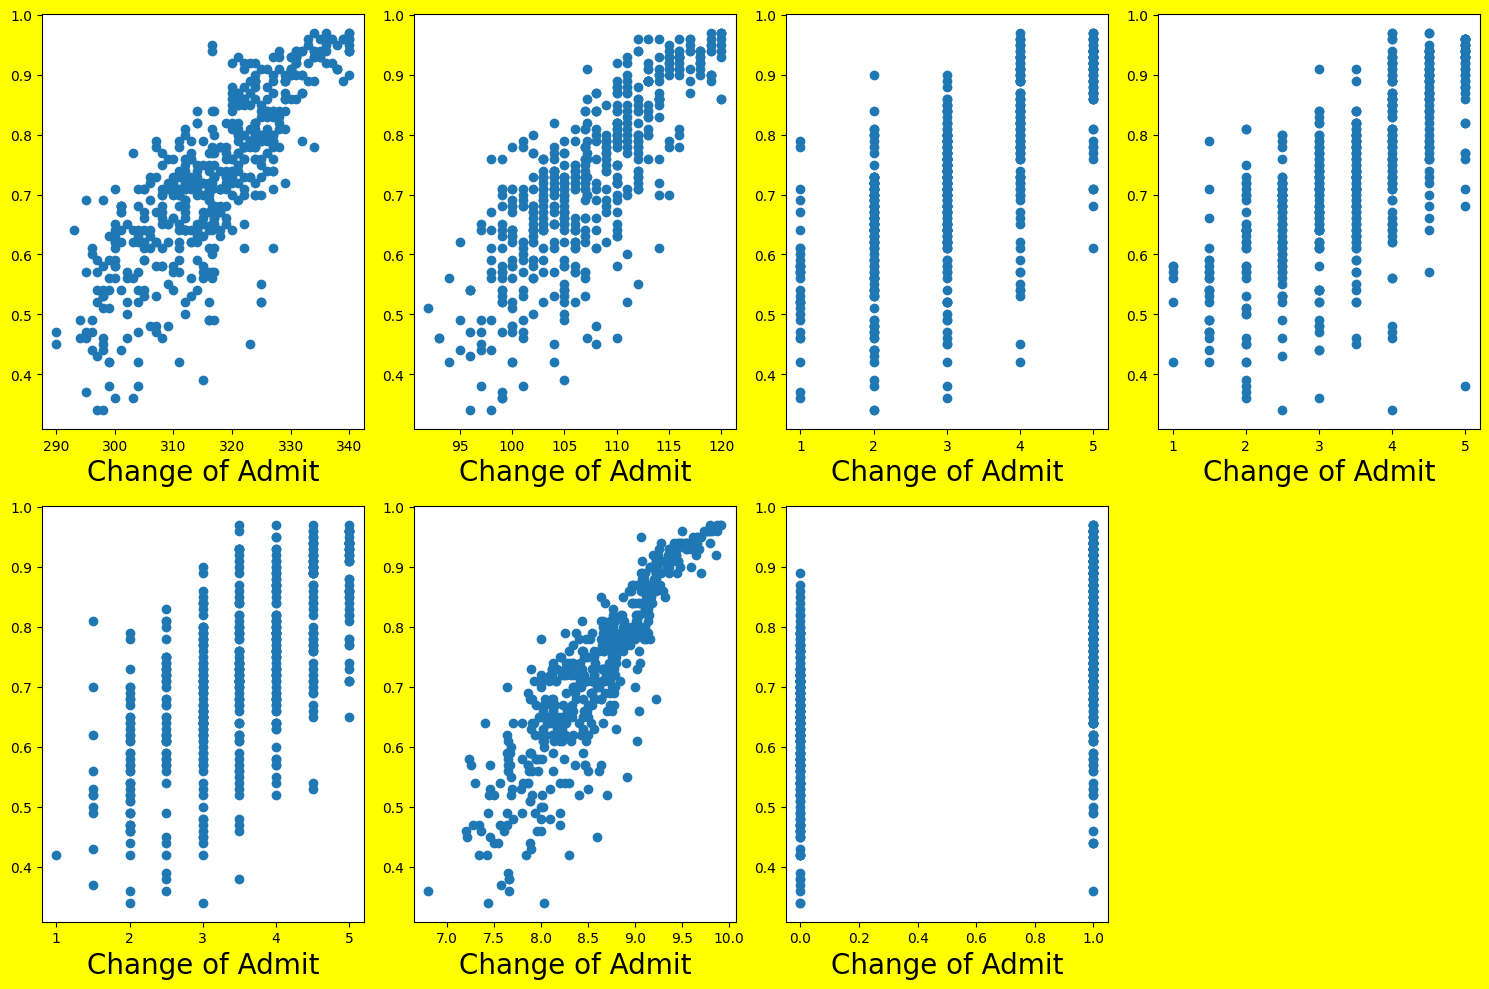

In [39]:
#lets see how the data is distributed for every column
#Visualizing relation ship
plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber = 1

for column in x:
    if plotnumber<=8:
         ax = plt.subplot(2,4,plotnumber)
         plt.scatter(x[column],y)
         plt.xlabel(column,fontsize=10)
         plt.xlabel('Change of Admit',fontsize=20)

    plotnumber+=1
plt.tight_layout()

The data distrubution looks decent enough and there doesn't seem to be any skewness .
Let's observer the relationship between independent variables and dependent variable



In [40]:
#Devide data set into features  and labels
y = data['Chance of Admit']
x = data.drop(columns = ['Chance of Admit'])

In [41]:
y


0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [42]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


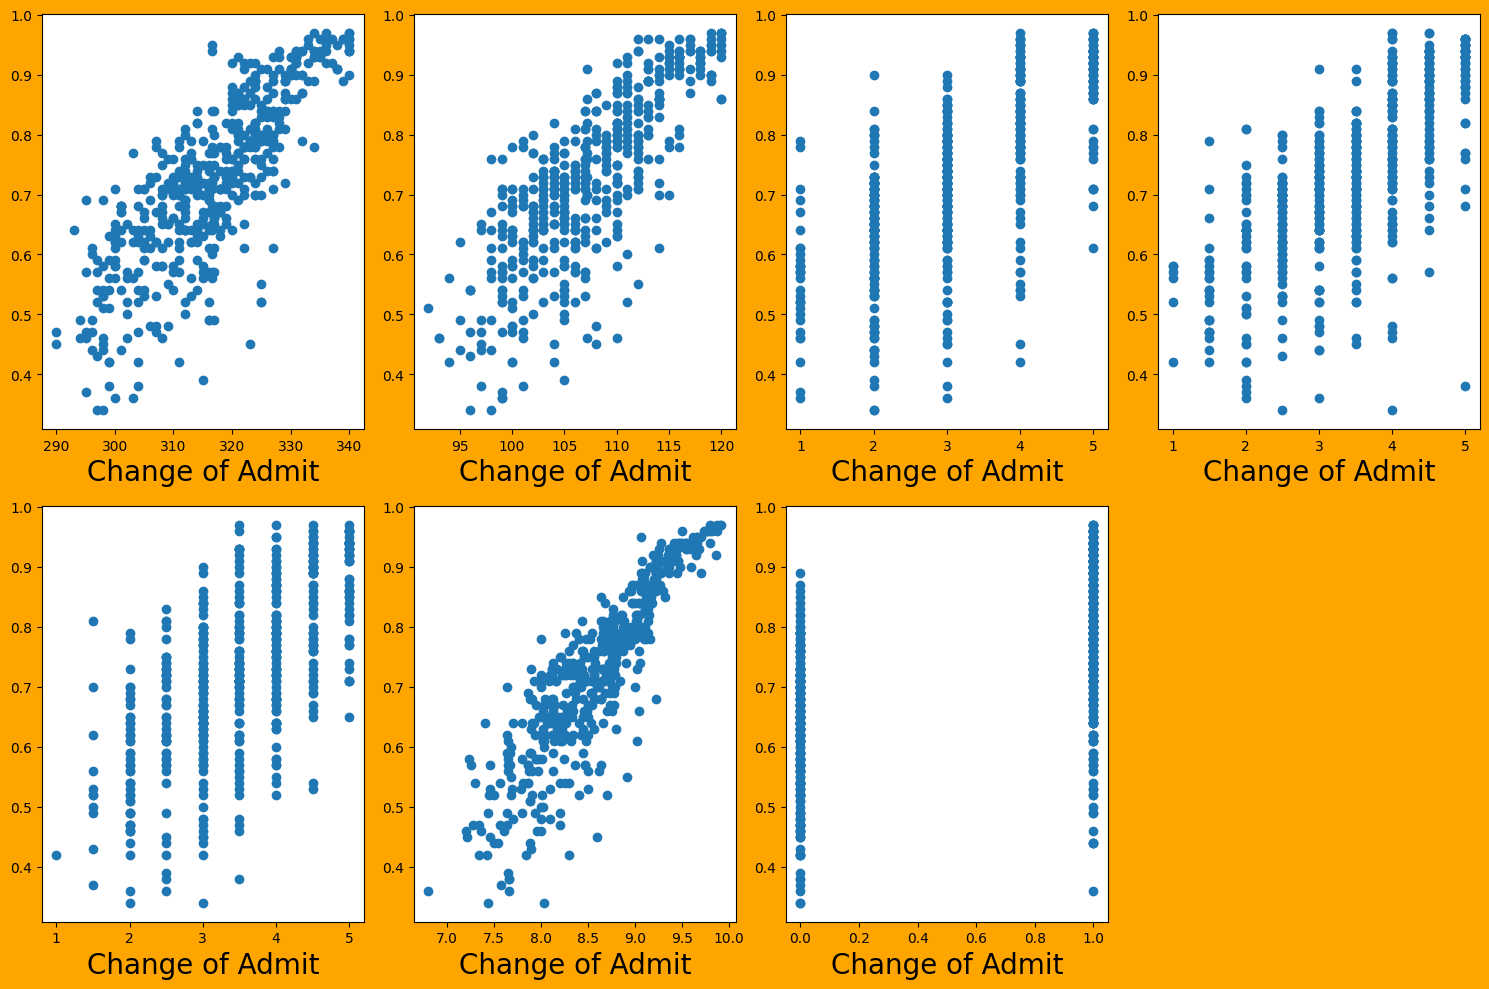

In [44]:
plt.figure(figsize=(15,10), facecolor='orange')
plotnumber = 1

for column in x:
    if plotnumber<=8:
         ax = plt.subplot(2,4,plotnumber)
         plt.scatter(x[column],y)
         plt.xlabel(column,fontsize=10)
         plt.xlabel('Change of Admit',fontsize=20)

    plotnumber+=1
plt.tight_layout()

In [53]:
#Data Scaling Formula Z = (X - mean)/std
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [54]:
X_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [49]:
#example of Standard Scaler
#you can also get help within notebook and refer whereever you have any confusion
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [58]:
#split data in to trainand test.
#Model will be build on training data and tested on test data
#importent one is " x is features and y is for labels ""Default test size is 25% and Order shuold be same like
#"x_train,x_test,y_train,y_test"
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=358)
y_train.head()

480    0.80
463    0.57
406    0.61
200    0.73
334    0.73
Name: Chance of Admit, dtype: float64

In [59]:
#Model Installation and training
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

 **Predict the cahnce od adminssions givenfeatures**

In [60]:
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


**#in real time data ,we have to run using Cloud flotform not in loal system .**

In [61]:
#Since we already fit the scaler,you can transfer the data
print('Chance of Admission is :',regression.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]])))

Chance of Admission is : [0.82233582]


In [ ]:
#saving the model to the local file system
#use https://www.geeksforgeeks.org/python-gui-tkinter/ for demo gui test and feel

In [66]:
#Saving the modelto the localfile system
#pickle.dump means "I have a model to save with new name "
pickle.dump(regression,open('reg_model','wb'))

In [69]:
#prediction using the saved model
loaded_model = pickle.load(open('reg_model','rb'))
a=loaded_model.predict(scaler.transform([[318.0,103.0, 4.0,	4.0,	5.0, 8.43,	0]]))

In [70]:
a

array([0.71371848])

**Now Lets check how well model fits on train data**

In [74]:
#Adjusted R2 Score
regression.score(x_train,y_train)


0.8067283237189959

In [75]:
#Lets check how well model fits the test data
regression.score(x_test,y_test)

0.8512052394923862

In [76]:
#Lets plot and visualize
x_test[1]

array([-1.04200191, -0.85814918, -0.99125473, -1.3878618 , -1.06433187,
       -0.65613201, -1.12815215])

In [77]:
y_pred =regression.predict(x_test)

In [78]:
y_pred

array([0.6048046 , 0.60352264, 0.85928468, 0.8546031 , 0.74239618,
       0.80716179, 0.89006652, 0.65958032, 0.59056876, 0.66576801,
       0.59262612, 0.59721436, 0.64117364, 0.91515564, 0.51841829,
       0.77337623, 0.7746478 , 0.62826383, 0.76597873, 0.5869292 ,
       0.81000536, 0.61263401, 0.5926249 , 0.52279198, 0.82970803,
       0.54199564, 0.72773606, 0.8345228 , 0.80400391, 0.77143119,
       0.90546711, 0.69910838, 0.56223189, 0.6416723 , 0.61038138,
       0.9060517 , 0.8814135 , 0.68747923, 0.66022015, 0.85540071,
       0.49128769, 0.94053844, 0.44043431, 0.81778027, 0.92340718,
       0.94871597, 0.62328705, 0.81193643, 0.92336047, 0.52664414,
       0.96547369, 0.7455182 , 0.79039186, 0.94669673, 0.53071028,
       0.71826232, 0.66829546, 0.90219675, 0.73346934, 0.75762502,
       0.9023762 , 0.92850799, 0.73258279, 0.69647364, 0.6430293 ,
       0.62383009, 0.69098322, 0.72001783, 0.70692825, 0.62774206,
       0.56090347, 0.7382732 , 0.90917826, 0.71029139, 0.79123

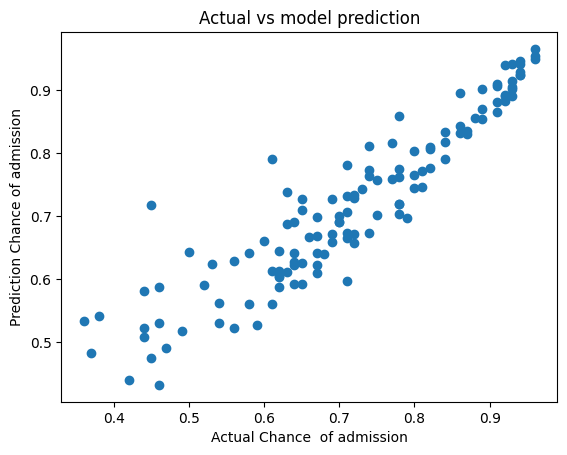

In [80]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Chance  of admission')
plt.ylabel('Prediction Chance of admission')
plt.title('Actual vs model prediction')
plt.show()

**Model validation**
1.Mean absolute error (MAE) :Represents average error

2.Mean squared error (MSE),Simillar ro MAE but noise is exaggerated and large errors are published .it is harder to interpret than MAE as it's not in base units,However,it is generally more popular

3.root mean squared error (RMSE) : most popular matric,similar to MSE,however the result is square rooted to make it more interpretable as it's in base units.is is recommended that RMSE be used as the primary metric to interpret your model


In [82]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [83]:
y_pred = regression.predict(x_test)

In [84]:
#MAE
mean_absolute_error(y_test,y_pred)

0.04220556881112816

In [85]:
#MSE
mean_squared_error(y_test,y_pred)

0.0035104859779904966

In [86]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

0.05924935424112651

**NOTE**:
All regression models same in all time .
Matrics :
R2 score
adjust R2 score
MAE
MSE
RMSE

**Lets see if our model is overfitting our training data**


**Regularization**

when we use regression models to train some data ,there is a good chance that the model will overfit the given training data set.

Regularization helps sort this overfitting problems by restricting the degrees of freedom of a givenquation

to regularize the model,a shrinkage penality is dded to the cost function.
Let's see different types od regularizations in regression:

 **1.LASSO(least absolute shrinkage and selectionoperator)Regression(L1 Form)

2.RIDGE(2 form)
3.ELASTICNET(Less popular)**

---
What are Overfitting and Underfitting?
Overfitting is a phenomenon that occurs when a Machine Learning model is constrained to the training set and not able to perform well on unseen data. That is when our model learns the noise in the training data as well. This is the case when our model memorizes the training data instead of learning the patterns in it.

Underfitting on the other hand is the case when our model is not able to learn even the basic patterns available in the dataset. In the case of the underfitting model is unable to perform well even on the training data hence we cannot expect it to perform well on the validation data. This is the case when we are supposed to increase the complexity of the model or add more features to the feature set.

Regularization in Machine Learning
Regularization is a technique used to reduce errors by fitting the function appropriately on the given training set and avoiding overfitting. The commonly used regularization techniques are :

 **Lasso Regularization – L1 Regularization**

**Ridge Regularization – L2 Regularization**

**Elastic Net Regularization – L1 and L2 Regularization**

Lasso Regression
A regression model which uses the L1 Regularization technique is called LASSO(Least Absolute Shrinkage and Selection Operator) regression. Lasso Regression adds the “absolute value of magnitude” of the coefficient as a penalty term to the loss function(L). Lasso regression also helps us achieve feature selection by penalizing the weights to approximately equal to zero if that feature does not serve any purpose in the model.

\rm{Cost} = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y_i})^2 +\lambda \sum_{i=1}^{m}{|w_i|}

where,

m – Number of Features
n – Number of Examples
y_i – Actual Target Value
y_i(hat) – Predicted Target Value


**Ridge Regression**
A regression model that uses the L2 regularization technique is called Ridge regression. Ridge regression adds the “squared magnitude” of the coefficient as a penalty term to the loss function(L).

\rm{Cost} = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y_i})^2 + \lambda \sum_{i=1}^{m}{w_i^2}


**Elastic Net Regression**
This model is a combination of L1 as well as L2 regularization. That implies that we add the absolute norm of the weights as well as the squared measure of the weights. With the help of an extra hyperparameter that controls the ratio of the L1 and L2 regularization.

\rm{Cost} = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y_i})^2 + \lambda\left((1-\alpha)\sum_{i=1}^{m}{|w_i|} + \alpha \sum_{i=1}^{m}{w_i^2}\right)

Don't miss your chance to ride the wave of the data revolution! Every industry is scaling new heights by tapping into the power of data. Sharpen your skills and become a part of the hottest trend in the 21st century.

In [87]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [90]:
lasscv = LassoCV(alphas = None, max_iter = 10)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=10)

In [91]:
#best alpha parameter
alpha = lasscv.alpha_
alpha


0.0006647491929391104

In [95]:
#now we have best perameter,lets lasso regression and see how well our data had fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0006647491929391104)

In [96]:

lasso_reg.score(x_test, y_test)

0.8503958836081653

In [97]:
#using RIDGE
np.arange(0.001,0.1,0.01)

array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091])

In [98]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [99]:
ridgecv.alpha_

0.09099999999999998

In [102]:
#Build Ridge model
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [103]:
ridge_model.score(x_test,y_test)

0.8511928343770591